# 2. 맷플롯립으로 확률 그래프 그리기
## 2.1. 맷플롯립으로 그래프 그리기

In [2]:
import matplotlib.pyplot as plt

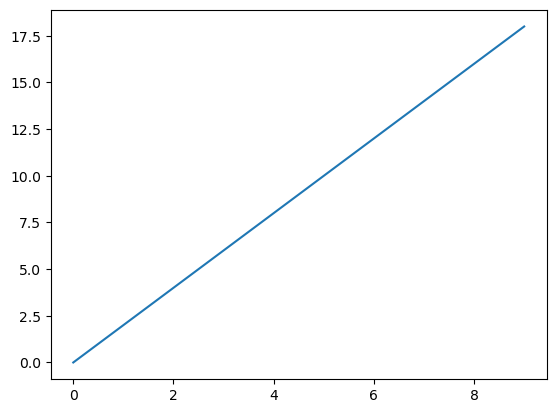

In [3]:
# 선형적 관계를 보여주는 그래프 그리기
x = range(0, 10)
y = [2*value for value in x]
plt.plot(x, y)
plt.show()

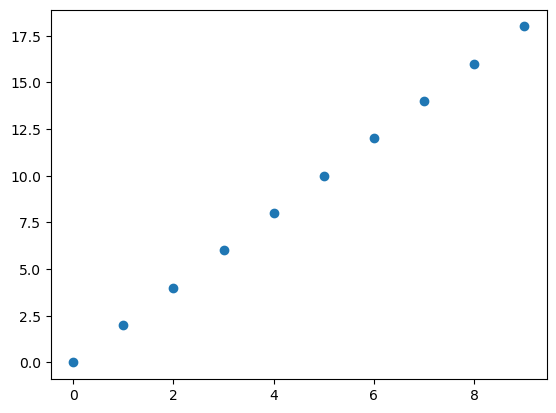

In [4]:
# 개별 데이터 포인트를 표시하는 그래프 그리기
plt.scatter(x, y)
plt.show()

In [5]:
# 1장 구간 함수 정의하기
def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum

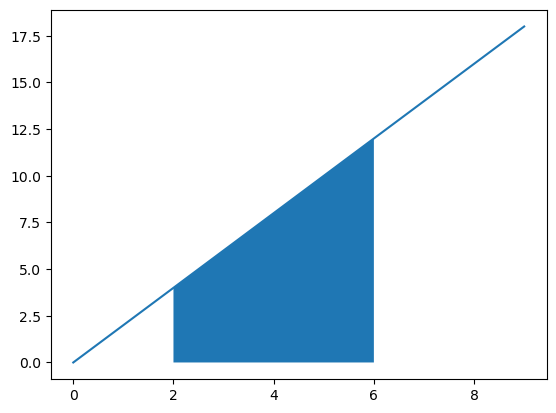

In [6]:
# 선 그래프 아래 특정 구간을 음영 처리하기
plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)
plt.show()

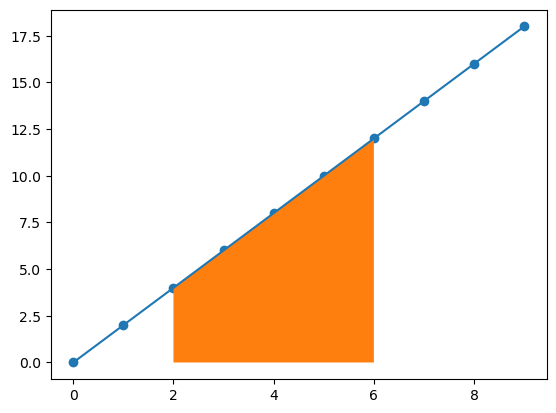

In [7]:
# 일직선에 개별 데이터 좌표 드러내기
plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)
plt.show()

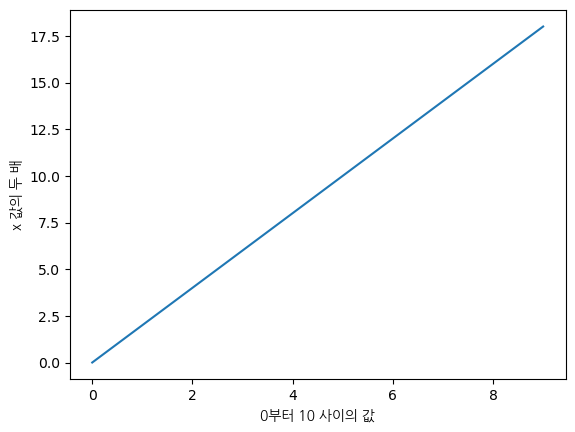

In [10]:
import matplotlib.font_manager as fm

# 나눔고딕 폰트 직접 지정
font_path = "./nanum-gothic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 축 레이블하기
plt.plot(x, y)
plt.xlabel("0부터 10 사이의 값", fontproperties=fontprop)
plt.ylabel("x 값의 두 배", fontproperties=fontprop)
plt.show()

## 2.2. 동전 뒤집기 확률 그래프 그리기

In [ ]:
from collections import defaultdict
from itertools import product

# 1장 동전 뒤집기 10번에 대한 표본 공간 계산하기
def generate_coin_sample_space(num_flips=10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(["앞면", "뒷면"], repeat=num_flips):
        heads_count = len([outcome for outcome in coin_flips if outcome == "앞면"])
        weighted_sample_space[heads_count] += 1
    return weighted_sample_space

weighted_sample_space = generate_coin_sample_space()

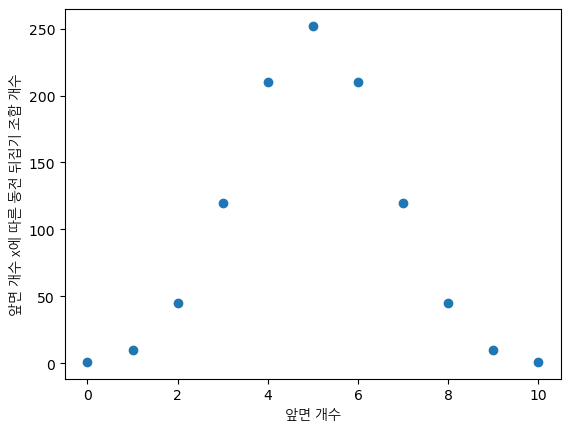

In [30]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel("앞면 개수", fontproperties=fontprop)
plt.ylabel("앞면 개수 x에 따른 동전 뒤집기 조합 개수", fontproperties=fontprop)
plt.show()


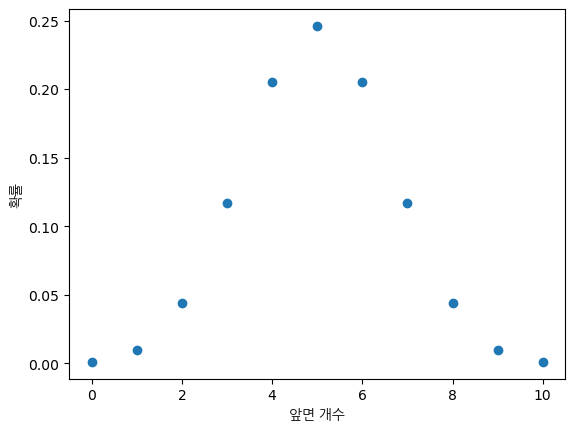

In [31]:
# 동전 뒤집기 확률 그래프
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel("앞면 개수", fontproperties=fontprop)
plt.ylabel("확률", fontproperties=fontprop)
plt.show()

In [32]:
# 모든 확률을 더하면 1.0이 된다는 것 검증하기
assert sum(prob_x_10_flips) == 1.0

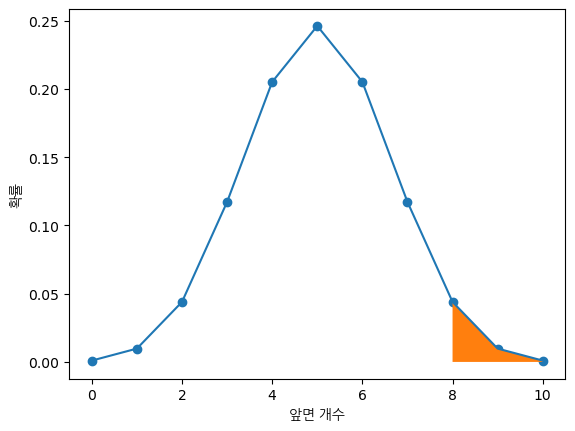

In [33]:
# 확률 곡선 아래의 특정 구간 음영 처리하기
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel("앞면 개수", fontproperties=fontprop)
plt.ylabel("확률", fontproperties=fontprop)
plt.show()

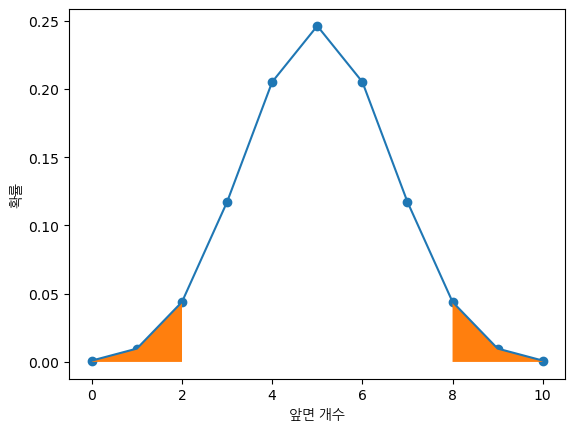

In [34]:
# 확률 곡선의 극단적인 구간 음영 처리하기
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel("앞면 개수", fontproperties=fontprop)
plt.ylabel("확률", fontproperties=fontprop)
plt.show()

### 2.2.1. 여러 동전 뒤집기 확률 분포도 비교하기

In [35]:
# 1장 동전 뒤집기 20번
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)

In [43]:
# 동전 뒤집기 분포 20번에 대한 확률 계산하기
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

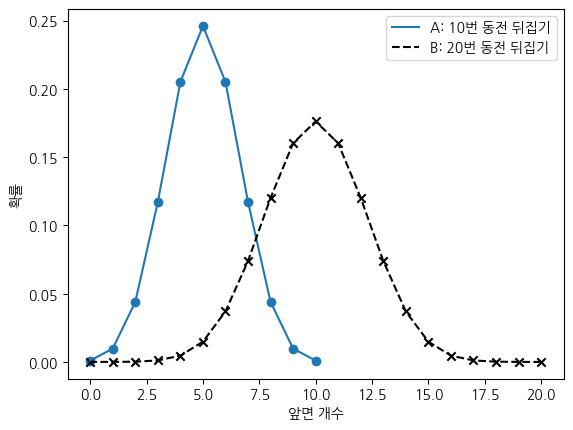

In [45]:
# 동시에 두 분포도 그리기
plt.rc('font', family=fontprop.get_name())
plt.plot(x_10_flips, prob_x_10_flips, label="A: 10번 동전 뒤집기")
plt.scatter(x_10_flips, prob_x_10_flips)
plt.plot(x_20_flips, prob_x_20_flips, color="black", linestyle="--", label="B: 20번 동전 뒤집기")
plt.scatter(x_20_flips, prob_x_20_flips, color='k', marker='x')
plt.xlabel("앞면 개수")
plt.ylabel("확률")
plt.legend()
plt.show()

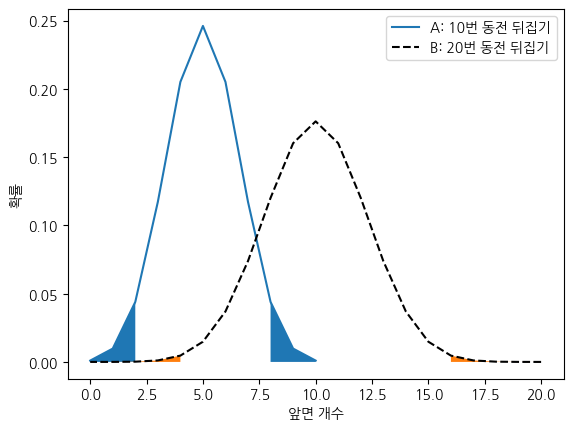

In [46]:
# 두 분포도의 구간 강조하기
plt.plot(x_10_flips, prob_x_10_flips, label="A: 10번 동전 뒤집기")
plt.plot(x_20_flips, prob_x_20_flips, color="black", linestyle="--", label="B: 20번 동전 뒤집기")
where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10)
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20)
plt.xlabel("앞면 개수")
plt.ylabel("확률")
plt.legend()
plt.show()

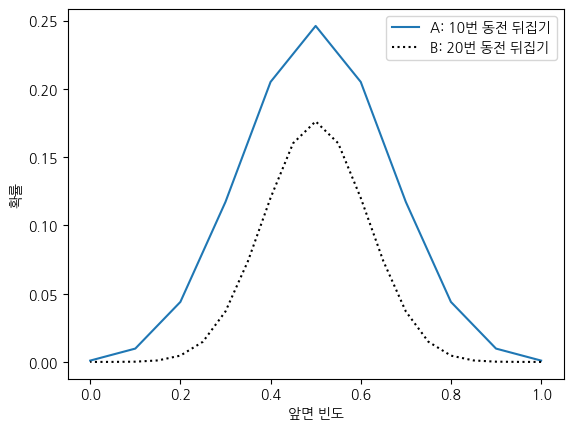

In [47]:
# 앞면 개수를 빈도로 변환하기
X_10_frequencies = [head_count / 10 for head_count in x_10_flips]
X_20_frequencies = [head_count / 20 for head_count in x_20_flips]

plt.plot(X_10_frequencies, prob_x_10_flips, label="A: 10번 동전 뒤집기")
plt.plot(X_20_frequencies, prob_x_20_flips, color="k", linestyle=":", label="B: 20번 동전 뒤집기")
plt.legend()
plt.xlabel("앞면 빈도")
plt.ylabel("확률")
plt.show()

In [48]:
#빈도에 대한 상대적 확률 계산하기
relative_likelihood_10 = [10*prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20*prob for prob in prob_x_20_flips]

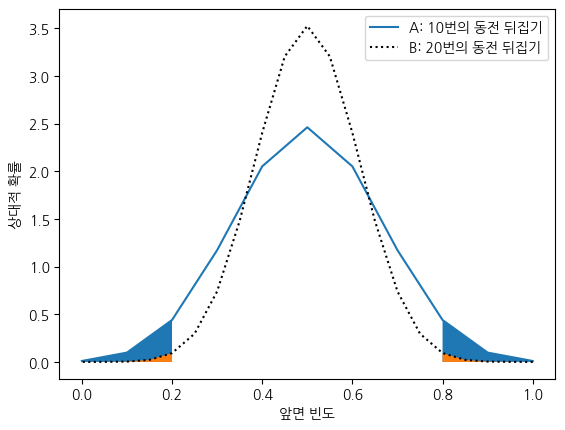

In [49]:
#상대적 확률 곡선 그리기기
plt.plot(X_10_frequencies, relative_likelihood_10, label='A: 10번의 동전 뒤집기')
plt.plot(X_20_frequencies, relative_likelihood_20, color='k', linestyle=':', label='B: 20번의 동전 뒤집기')
plt.fill_between(X_10_frequencies, relative_likelihood_10, where=where_10)
plt.fill_between(X_20_frequencies, relative_likelihood_20, where=where_20)
plt.legend()
plt.xlabel("앞면 빈도")
plt.ylabel("상대적 확률")
plt.show()

## 2.3. 요약
- 확률 분포의 총 면적(영역) 합은 1.0. 분포의 특정 구간 면적은 해당 구간에 특정 값이 속할 확률
- 확률 분포도 y축 값은 반드시 확률과 일치할 필요 X. 그래프의 총 면적이 1.0만 되면 됨.
- 공평한 동전 뒤집기의 확률 분포도는 좌우 대칭 곡선 형태를 띰
- 큰 수의 법칙에 따르면 모든 관측 빈도는 관측 횟수가 커질수록 해당 관측 확률에 근접함.